In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.compose import make_column_transformer
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_selection import RFE,RFECV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import StratifiedKFold


In [3]:
pd.set_option('display.max_columns',25)

In [4]:
data=pd.read_excel('data.xls')

In [5]:
data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [6]:
df=data.copy()

In [7]:
df=df.drop('Unnamed: 0',axis=1)

In [8]:
df=df.drop([0])

In [9]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [10]:
var_quant=df.loc[:,['X1', 'X5', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20' ,'X21', 'X22' ,'X23']]
var_qual=df.loc[:,['X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11']]
var_qual['X4'] = var_qual['X4'].apply(lambda x:3 if x==0 else x )
var_qual['X3']= var_qual['X3'].apply(lambda x:4 if x in [5,6,0] else x)
var_qual["X3"].describe()

count    30000.000000
mean         1.842267
std          0.744494
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: X3, dtype: float64

In [11]:
numerical_features=var_quant.columns
categorical_features=var_qual.columns

In [12]:
numerical_features

Index(['X1', 'X5', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23'],
      dtype='object')

In [13]:
categorical_features

Index(['X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11'], dtype='object')

In [14]:
x=df.drop('Y',axis=1)
y=df['Y'].astype('int64')

In [15]:
x

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [16]:
y

1        1
2        1
3        0
4        0
5        0
        ..
29996    0
29997    0
29998    1
29999    1
30000    1
Name: Y, Length: 30000, dtype: int64

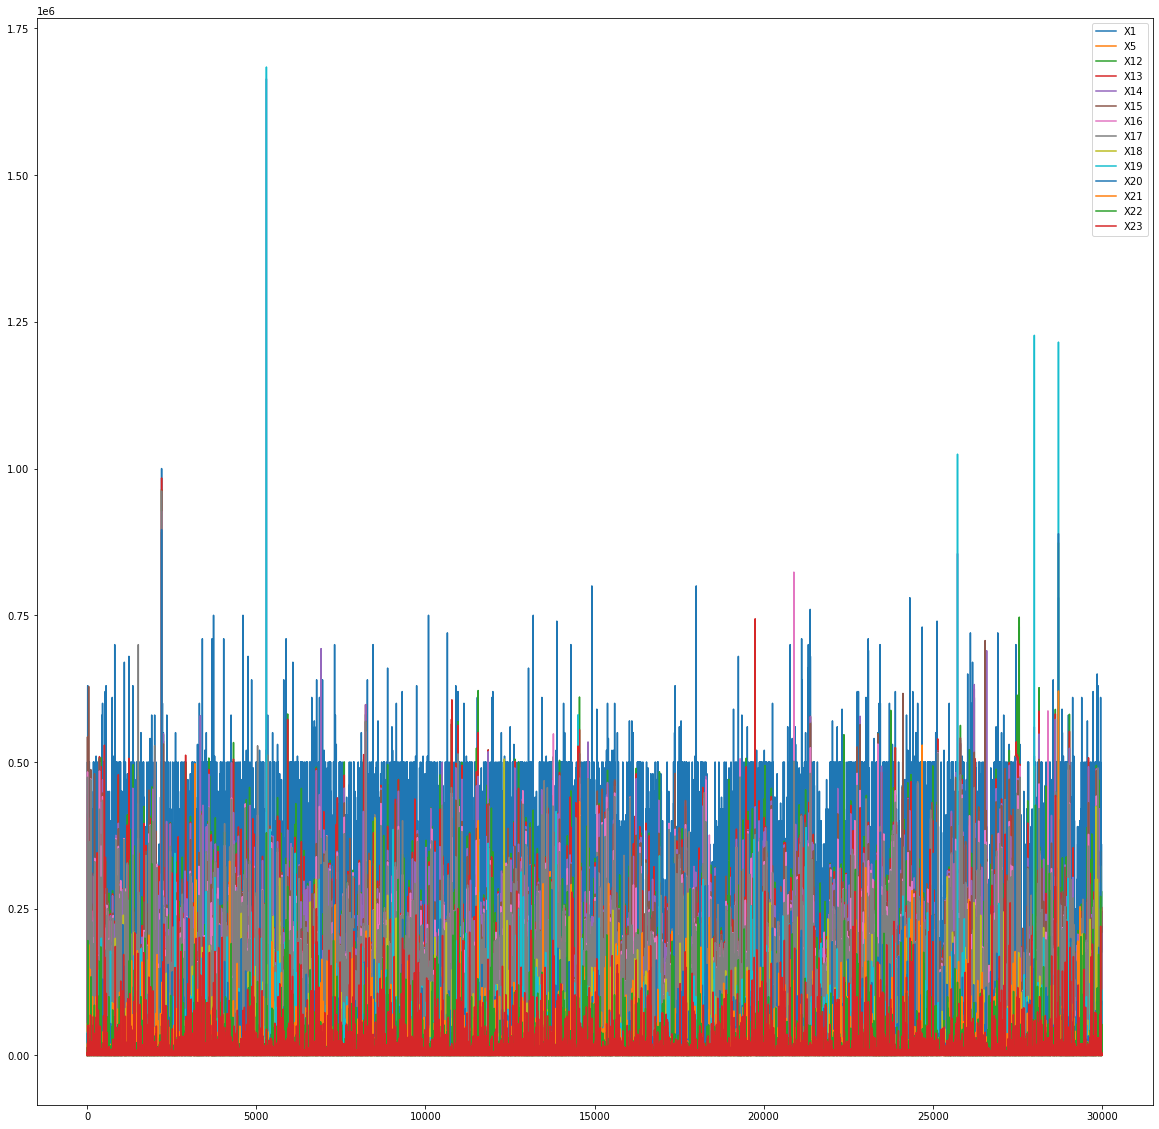

In [17]:
plt.figure(figsize=(20,20))
plt.plot(np.abs(var_quant))
plt.legend(var_quant.columns)

In [18]:
var_quant.var(axis=0).sort_values()

X5     8.496976e+01
X22    2.334266e+08
X21    2.454286e+08
X18    2.743423e+08
X20    3.100051e+08
X23    3.160383e+08
X19    5.308817e+08
X17    3.546692e+09
X16    3.696294e+09
X15    4.138716e+09
X14    4.809338e+09
X13    5.065705e+09
X12    5.422240e+09
X1     1.683446e+10
dtype: float64

In [19]:
#la dispersion des variables est grande

1-K_nearest neighbor classifiers:

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
#x_train.shape
#x_test.shape


In [21]:


#grid.fit(x_train_trans,y_train)


In [22]:
#pca.fit_transform(x_train)

In [23]:
#np.sum(pca.explained_variance_ratio_)

In [24]:
#x_train.astype('float').corr()

In [25]:
#def correlatedFeatures(dataset, threshold):
#    correlated_columns = set()
#    correlations = dataset.corr()
 #   for i in range(len(correlations)):
#        for j in range(i):
#            if abs(correlations.iloc[i,j]) > threshold:
#                correlated_columns.add(correlations.columns[i])
#    return correlated_columns

In [26]:
#cf = correlatedFeatures(x_train.astype('float'), 0.7)
#cf

In [27]:
#X_train = x_train.drop(cf, axis=1)
#X_test = x_test.drop(cf, axis=1)

In [28]:
#print(X_train.shape)
#print(X_test.shape)

In [29]:
#X_train

In [30]:
#param={'n_neighbors':np.arange(1,11),'metric':['euclidean','manhattan','minkowski'],'p':np.arange(1,3)}

In [31]:
#new_quant=df.loc[:,['X2', 'X3', 'X4', 'X6', 'X7']]
#new_qual=df.loc[:,['X1', 'X5', 'X12', 'X18', 'X19', 'X20' ,'X21', 'X22' ,'X23']]
numerical_features=var_quant.columns
categorical_features=var_qual.columns

numerical_pipline=make_pipeline(RobustScaler(),PCA(n_components=8))
categorical_pipline=make_pipeline(SimpleImputer())

In [32]:
preprocessor=make_column_transformer((numerical_pipline,numerical_features),(categorical_pipline,categorical_features))

In [33]:
x_train_trans=preprocessor.fit_transform(x_train)
#x_train_trans.shape
#pca=PCA(n_components=8)
#pca.fit_transform(x_train_trans)
#pca.transform()
#np.sum(x_train_trans.explained_variance_ratio_)

#x_train_trans.shape




In [34]:
x_test_trans=preprocessor.transform(x_test)
#pca.transform(x_test_trans)
#np.sum(pca.explained_variance_ratio_)
#x_test_trans.shape
#cv5=StratifiedKFold(5)

#cv10=StratifiedKFold(10)


In [35]:
#StratifiedKFold?

In [36]:
#my_dict = {"cv":[],"score":[]};
                       
#for i in np.arange(2,11,1):
#cv=StratifiedKFold(6,shuffle=True,random_state=0)
param={'n_neighbors':np.arange(1,11),'metric':['euclidean','manhattan','minkowski'],'p':np.arange(1,3)}
cv=StratifiedKFold(6, shuffle=True,random_state=0)
grid=GridSearchCV(KNeighborsClassifier(),param_grid=param,cv=cv.split(x_train_trans,y_train),n_jobs=8)
grid.fit(x_train_trans,y_train)
#model_best=grid.best_estimator_
    
   # my_dict["cv"].append(i)

    #my_dict["score"].append( model_best.score(x_train_trans,y_train))


GridSearchCV(cv=<generator object _BaseKFold.split at 0x0000024594C9DB30>,
             estimator=KNeighborsClassifier(), n_jobs=8,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'p': array([1, 2])})

In [37]:
#my_dict

In [38]:
grid.best_score_

0.8064166666666667

In [39]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 10, 'p': 1}

In [40]:
model_best=grid.best_estimator_

In [41]:
model_best.score(x_train_trans,y_train)

0.827875

In [42]:
model_best.score(x_test_trans,y_test)

0.8121666666666667

In [43]:
y_pred=model_best.predict(x_test_trans)

In [44]:
#plt.hist(y_pred)

In [45]:
#plt.hist(y_test)

In [46]:
#y_test.sum()

In [47]:
#y_pred.sum()

In [48]:
#y_pred.sum()/y_test.sum()

In [49]:
#abs(y_test-y_pred)

In [50]:
print(confusion_matrix(y_test,y_pred))

[[4476  227]
 [ 900  397]]


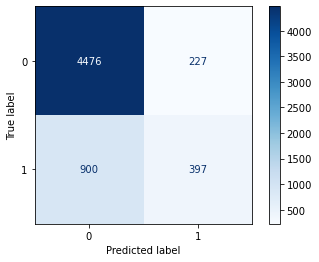

In [51]:
plot_confusion_matrix(model_best, x_test_trans, y_test,cmap=plt.cm.Blues)  
plt.show()

2-LOGISTIC REGRESSION:

In [52]:
#my_dict = {"min_feat_quant":[],"min_feat_qual":[],"score":[]};
#for i in np.arange(8,15,1)   :
#    for j in np.arange(1,10,1):
#        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
#        numerical_features=var_quant.columns
#        categorical_features=var_qual.columns

#        numerical_pipline=make_pipeline(RFECV(LogisticRegression(random_state=0),step=1,min_features_to_select=i,cv=5),RobustScaler(),PCA(n_components=8))
#        categorical_pipline=make_pipeline(SimpleImputer(),RFECV(LogisticRegression(random_state=0),step=1,min_features_to_select=j,cv=5))
#        preprocessor=make_column_transformer((numerical_pipline,numerical_features),(categorical_pipline,categorical_features))
#        param={'C' : np.linspace(-4, 4, 20), 'penalty' : ['l1', 'l2', 'elasticnet', 'none']}
#        x_train_trans=preprocessor.fit_transform(x_train,y_train)
#        x_test_trans=preprocessor.transform(x_test)
#        grid=GridSearchCV(LogisticRegression(random_state=0),param_grid=param,cv=5)
#        grid.fit(x_train_trans,y_train)
#        model_best=grid.best_estimator_
#        model_best.score(x_train_trans,y_train)
#        my_dict["min_feat_quant"].append(i)
#        my_dict["min_feat_qual"].append(j)
#        my_dict["score"].append( model_best.score(x_train_trans,y_train))

#x_train.shape

In [53]:
#grid.best_score_

In [54]:
#print(my_dict["min_feat_quant"][54])
#print(my_dict["min_feat_qual"][54])
#print(np.round(my_dict["score"][54],3))


In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
numerical_features=var_quant.columns
categorical_features=var_qual.columns
cv=StratifiedKFold(6, shuffle=True,random_state=0)

numerical_pipline=make_pipeline(RFECV(LogisticRegression(random_state=0),step=1,min_features_to_select=13,cv=5),RobustScaler(),PCA(n_components=8))
categorical_pipline=make_pipeline(SimpleImputer(),RFECV(LogisticRegression(random_state=0),step=1,min_features_to_select=1,cv=5))
preprocessor=make_column_transformer((numerical_pipline,numerical_features),(categorical_pipline,categorical_features))
param={'C' : np.linspace(-4, 4, 20), 'penalty' : ['l1', 'l2', 'elasticnet', 'none']}
x_train_trans=preprocessor.fit_transform(x_train,y_train)
x_test_trans=preprocessor.transform(x_test)
grid=GridSearchCV(LogisticRegression(random_state=0),param_grid=param,cv=cv)
grid.fit(x_train_trans,y_train)
model_best=grid.best_estimator_
model_best.score(x_train_trans,y_train)

C:\Users\alish\anaconda3_new\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\alish\anaconda3_new\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

C:\Users\alish\anaconda3_new\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\alish\anaconda3_new\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\alish\anaconda3_new\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\alish\anaconda3_new\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\alish\anaconda3_new\lib\site-package

C:\Users\alish\anaconda3_new\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\alish\anaconda3_new\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\alish\anaconda3_new\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\alish\anaconda3_new\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\alish\anaconda3_new\lib\site-packages\sklear

C:\Users\alish\anaconda3_new\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\alish\anaconda3_new\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\alish\anaconda3_new\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\alish\anaconda3_new\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\alish\anaconda3_new\lib\site-package

C:\Users\alish\anaconda3_new\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\alish\anaconda3_new\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\alish\anaconda3_new\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\alish\anaconda3_new\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\alish\anaconda3_new\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users

C:\Users\alish\anaconda3_new\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\alish\anaconda3_new\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\alish\anaconda3_new\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\alish\anaconda3_new\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\alish\anaconda3_new\lib\site-package

C:\Users\alish\anaconda3_new\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\alish\anaconda3_new\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\alish\anaconda3_new\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\alish\anaconda3_new\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\alish\anaconda3_new\lib\site-package

C:\Users\alish\anaconda3_new\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\alish\anaconda3_new\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\alish\anaconda3_new\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\alish\anaconda3_new\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\alish\anaconda3_new\lib\site-package

C:\Users\alish\anaconda3_new\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\alish\anaconda3_new\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\alish\anaconda3_new\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\alish\anaconda3_new\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\alish\anaconda3_new\lib\site-package

C:\Users\alish\anaconda3_new\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\alish\anaconda3_new\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\alish\anaconda3_new\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\alish\anaconda3_new\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\alish\anaconda3_new\lib\site-package

C:\Users\alish\anaconda3_new\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\alish\anaconda3_new\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\alish\anaconda3_new\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\alish\anaconda3_new\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\alish\anaconda3_new\lib\site-package

C:\Users\alish\anaconda3_new\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\alish\anaconda3_new\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\alish\anaconda3_new\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\alish\anaconda3_new\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\alish\anaconda3_new\lib\site-package

C:\Users\alish\anaconda3_new\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\alish\anaconda3_new\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\alish\anaconda3_new\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\alish\anaconda3_new\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\alish\anaconda3_new\lib\site-package

0.809

In [56]:
grid.best_params_

{'C': 0.21052631578947345, 'penalty': 'none'}

In [57]:
#param ={'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
#             'C' : np.linspace(-4, 4, 20),
#             'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
#             'max_iter' : [100, 1000,2500, 5000]
#             }


In [58]:
model_best.score(x_test_trans,y_test)

0.8225

In [59]:
y_pred=model_best.predict(x_test_trans)

In [60]:
print(confusion_matrix(y_test,y_pred))

[[4579  124]
 [ 941  356]]


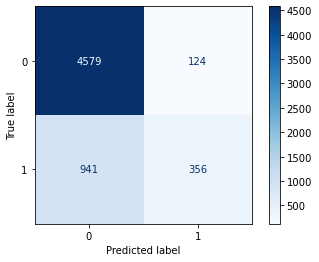

In [61]:
plot_confusion_matrix(model_best, x_test_trans, y_test,cmap=plt.cm.Blues)  
plt.show()

3-DECISION_TREE:

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [63]:
dt=DecisionTreeClassifier(random_state=0,criterion='gini')

In [64]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [65]:
print('score entrainement=',dt.score(x_train,y_train))
print('score test=',dt.score(x_test,y_test))

score entrainement= 0.999625
score test= 0.7376666666666667


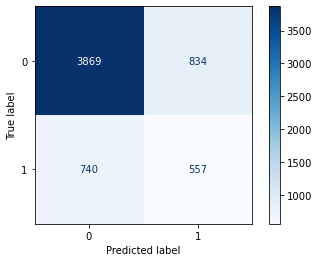

In [66]:
plot_confusion_matrix(dt, x_test, y_test,cmap=plt.cm.Blues)  
plt.show()

In [67]:
y_pred=dt.predict(x_test)
print(classification_report(y_test,y_pred,digits=6))

              precision    recall  f1-score   support

           0   0.839445  0.822666  0.830971      4703
           1   0.400431  0.429453  0.414435      1297

    accuracy                       0.737667      6000
   macro avg   0.619938  0.626059  0.622703      6000
weighted avg   0.744545  0.737667  0.740930      6000



In [68]:
names=x.columns
names

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23'],
      dtype='object')

In [69]:
for var,importance in zip(names,dt.feature_importances_):
    if(importance!=0):
        print(var,importance)


X1 0.06049893652034217
X2 0.012139963382710417
X3 0.024038582058667417
X4 0.016347386421519804
X5 0.06866224717244629
X6 0.15637208510173825
X7 0.03679949255481393
X8 0.008827785978559948
X9 0.01081097880841642
X10 0.010556241520894393
X11 0.011035138472453075
X12 0.06609774346994902
X13 0.03867918599514651
X14 0.04006487456256134
X15 0.041508489166922714
X16 0.04482162797196805
X17 0.04833772252901536
X18 0.04952815597310461
X19 0.05498739114813921
X20 0.05427713515381548
X21 0.04566172412652456
X22 0.04479356111739402
X23 0.05515355079289714


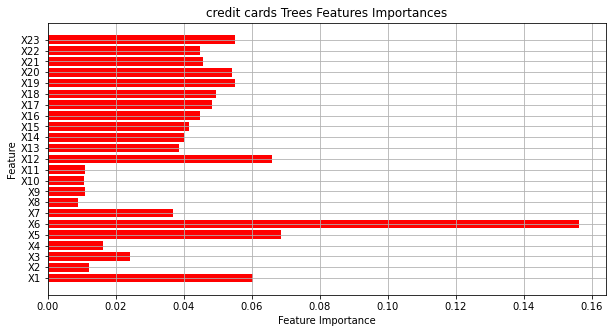

In [70]:
def credit_cards_feature_importances_plot(model):
    plt.figure(figsize=(10,5))
    plt.barh(range(len(names)), model.feature_importances_, align='center', color='red')
    plt.yticks(np.arange(len(names)), names)
    plt.title('credit cards Trees Features Importances')
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.grid(True)
credit_cards_feature_importances_plot(dt)
plt.show()


In [71]:
#plt.figure(figsize=(20, 10))
#plot_tree(dt, feature_names=names)
#plt.show()

In [72]:
param={'criterion':['gini','entropy'],'max_depth':np.arange(1,10,1)}
cv=StratifiedKFold(6, shuffle=True,random_state=0)
grid=GridSearchCV(DecisionTreeClassifier(random_state=0),param_grid=param,cv=cv)
grid.fit(x_train,y_train)
model_best=grid.best_estimator_

In [73]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 4}

In [74]:
print('score test=',model_best.score(x_test,y_test))
print('score entrainement=',model_best.score(x_train,y_train))

score test= 0.8275
score entrainement= 0.821125


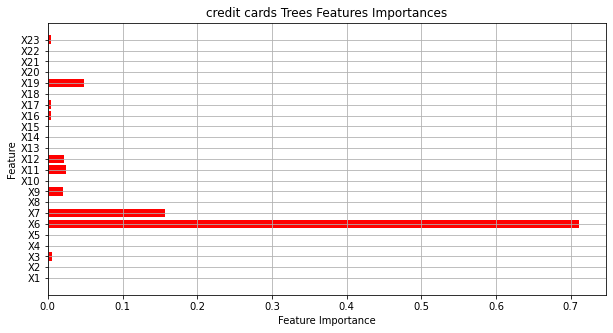

In [75]:
credit_cards_feature_importances_plot(model_best)
plt.show()

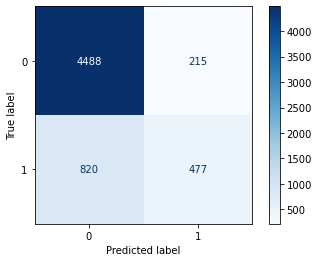

In [76]:
plot_confusion_matrix(model_best, x_test, y_test,cmap=plt.cm.Blues)  
plt.show()

In [77]:
y_pred=model_best.predict(x_test)
print(classification_report(y_test,y_pred,digits=6))

              precision    recall  f1-score   support

           0   0.845516  0.954284  0.896614      4703
           1   0.689306  0.367772  0.479638      1297

    accuracy                       0.827500      6000
   macro avg   0.767411  0.661028  0.688126      6000
weighted avg   0.811749  0.827500  0.806477      6000



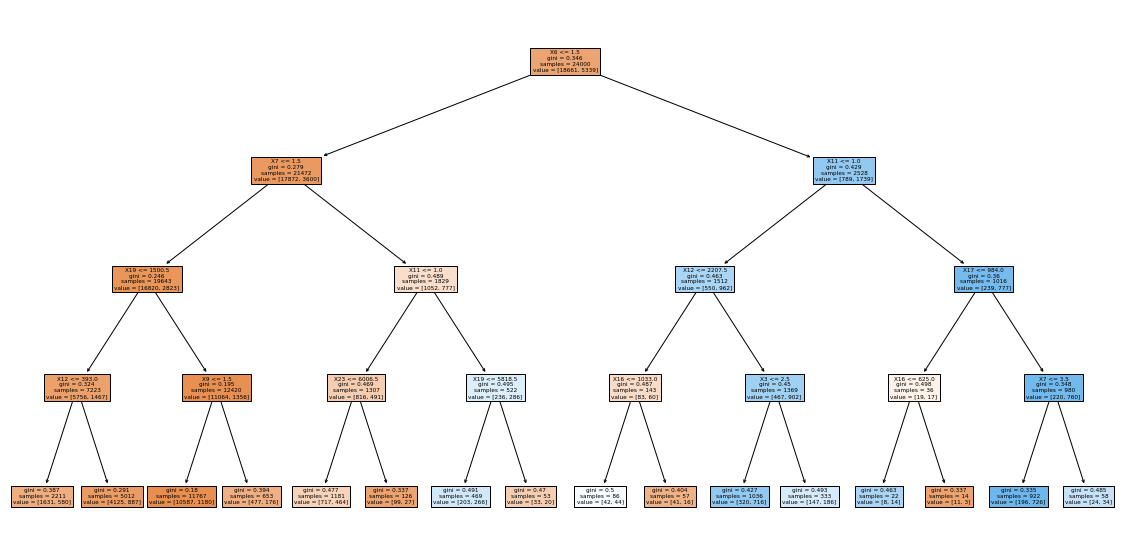

In [78]:
plt.figure(figsize=(20, 10))
plot_tree(model_best, feature_names=names,  filled=True)
plt.show()

In [79]:
print(export_text(model_best,feature_names=['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23'],show_weights=True))

|--- X6 <= 1.50
|   |--- X7 <= 1.50
|   |   |--- X19 <= 1500.50
|   |   |   |--- X12 <= 393.00
|   |   |   |   |--- weights: [1631.00, 580.00] class: 0
|   |   |   |--- X12 >  393.00
|   |   |   |   |--- weights: [4125.00, 887.00] class: 0
|   |   |--- X19 >  1500.50
|   |   |   |--- X9 <= 1.50
|   |   |   |   |--- weights: [10587.00, 1180.00] class: 0
|   |   |   |--- X9 >  1.50
|   |   |   |   |--- weights: [477.00, 176.00] class: 0
|   |--- X7 >  1.50
|   |   |--- X11 <= 1.00
|   |   |   |--- X23 <= 6006.50
|   |   |   |   |--- weights: [717.00, 464.00] class: 0
|   |   |   |--- X23 >  6006.50
|   |   |   |   |--- weights: [99.00, 27.00] class: 0
|   |   |--- X11 >  1.00
|   |   |   |--- X19 <= 5818.50
|   |   |   |   |--- weights: [203.00, 266.00] class: 1
|   |   |   |--- X19 >  5818.50
|   |   |   |   |--- weights: [33.00, 20.00] class: 0
|--- X6 >  1.50
|   |--- X11 <= 1.00
|   |   |--- X12 <= 2207.50
|   |   |   |--- X16 <= 1033.00
|   |   |   |   |--- weights: [42.00, 44.00] c

In [80]:
print(classification_report(y_test,y_pred,digits=6))

              precision    recall  f1-score   support

           0   0.845516  0.954284  0.896614      4703
           1   0.689306  0.367772  0.479638      1297

    accuracy                       0.827500      6000
   macro avg   0.767411  0.661028  0.688126      6000
weighted avg   0.811749  0.827500  0.806477      6000



4- LinearDiscriminantAnalysis

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [82]:
numerical_features=var_quant.columns
categorical_features=var_qual.columns

numerical_pipline=make_pipeline(RobustScaler(),PCA(n_components=8))
categorical_pipline=make_pipeline(SimpleImputer())
preprocessor=make_column_transformer((numerical_pipline,numerical_features),(categorical_pipline,categorical_features))
x_train_trans=preprocessor.fit_transform(x_train)
x_test_trans=preprocessor.transform(x_test)


In [83]:
model = LinearDiscriminantAnalysis()
model.fit(x_train_trans, y_train)

LinearDiscriminantAnalysis()

In [84]:
model.score(x_train_trans, y_train)

0.8084583333333333